In [2]:
pip install scikit-learn==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
#Importy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import scipy.io
import sklearn
from sklearn import  model_selection
import random as rn
import time
import pickle
import copy



# wszystki pliki csv
https://drive.google.com/drive/folders/131hAgCCu642YH6gBJarpKCoAfJSF8laM?usp=sharing

In [4]:
# wczytanie danych:
dataset = pd.read_csv("/content/drive/MyDrive/MAGISTERKA/pliki_artykul/handlandmarks_all_v2_p1")
#TRAIN = pd.read_csv("/content/drive/MyDrive/MAGISTERKA/pliki_artykul/handlandmarks_train.csv")
#TEST = pd.read_csv("/content/drive/MyDrive/MAGISTERKA/pliki_artykul/handlandmarks_test.csv")

X_train = dataset.values[:, 1:]
Y_train = dataset.values[:, 0]


#x_test = TEST.values[:, 1:]
#y_test = TEST.values[:, 0]

NUM_CLASSES = 29
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
               11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
               21, 22, 23, 24, 25, 26, 27, 28] # znaki: B, Bk, Cm


In [5]:
indices = pd.read_csv("/content/drive/MyDrive/MAGISTERKA/pliki_artykul/inx_kfold_all.csv")
indices

,10
0,10
1,5
2,7
3,2
4,2
...,...
26710,8
26711,1
26712,1
26713,5


# Funkcja do oceny

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(13, 11))
    plt.title("Confusion matrix", fontsize = 25)

    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.xlabel("Actual classes", fontsize = 20, labelpad=10)
    plt.ylabel("Predicted classes", fontsize = 20, labelpad=10)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

# Random Forest z k foldem

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics

In [8]:
clf = RandomForestClassifier( max_leaf_nodes=1000,
            n_estimators=100, n_jobs=1)

1


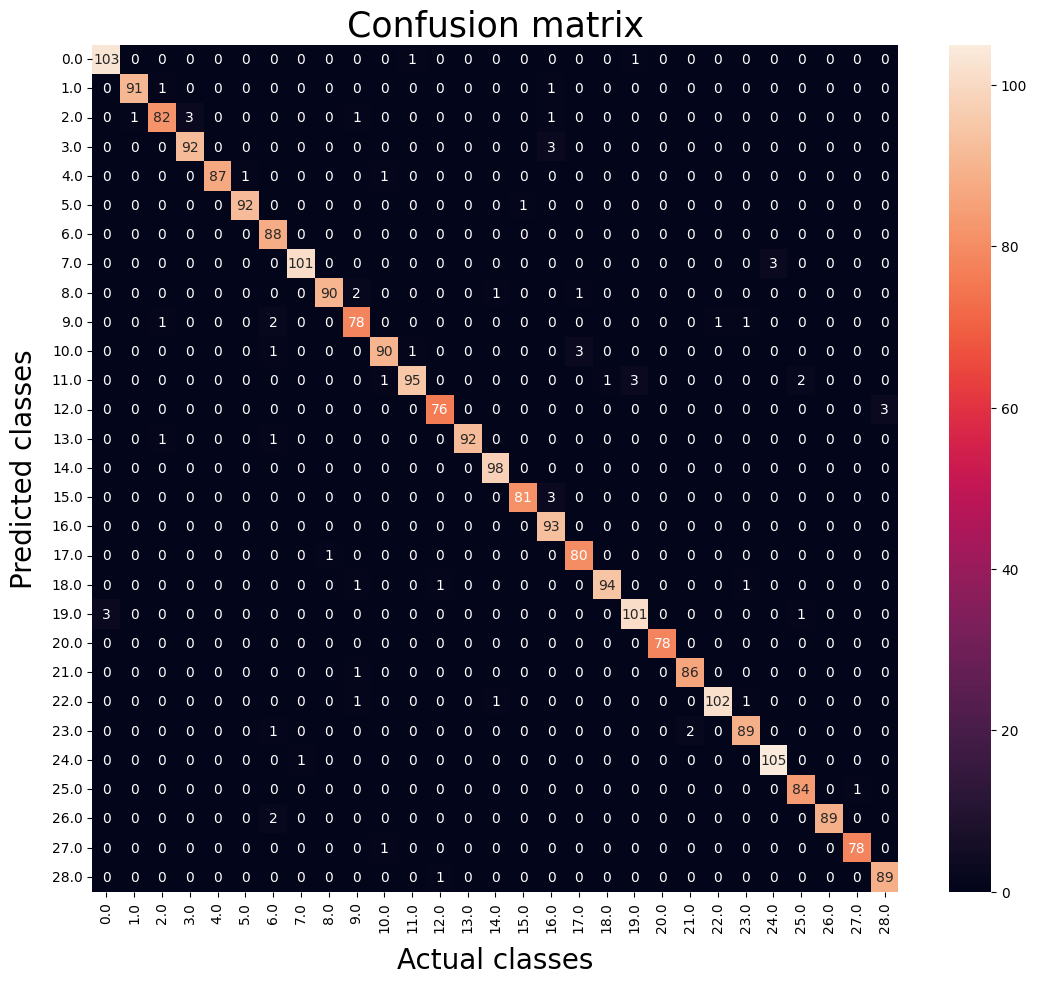

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       105
         1.0       0.99      0.98      0.98        93
         2.0       0.96      0.93      0.95        88
         3.0       0.97      0.97      0.97        95
         4.0       1.00      0.98      0.99        89
         5.0       0.99      0.99      0.99        93
         6.0       0.93      1.00      0.96        88
         7.0       0.99      0.97      0.98       104
         8.0       0.99      0.96      0.97        94
         9.0       0.93      0.94      0.93        83
        10.0       0.97      0.95      0.96        95
        11.0       0.98      0.93      0.95       102
        12.0       0.97      0.96      0.97        79
        13.0       1.00      0.98      0.99        94
        14.0       0.98      1.00      0.99        98
        15.0       0.99      0.96      0.98        84
        16.0       0.92      1.00      0.96        93
     

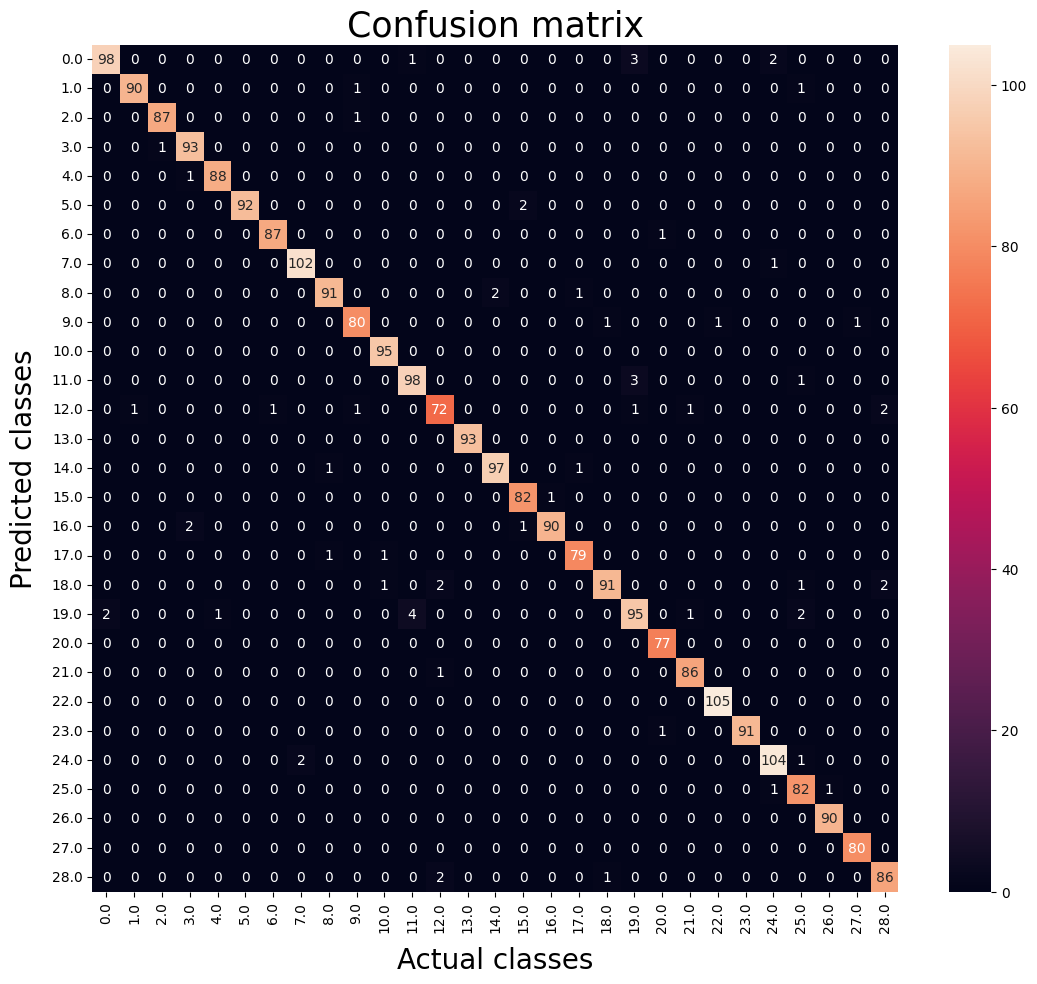

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       104
         1.0       0.99      0.98      0.98        92
         2.0       0.99      0.99      0.99        88
         3.0       0.97      0.99      0.98        94
         4.0       0.99      0.99      0.99        89
         5.0       1.00      0.98      0.99        94
         6.0       0.99      0.99      0.99        88
         7.0       0.98      0.99      0.99       103
         8.0       0.98      0.97      0.97        94
         9.0       0.96      0.96      0.96        83
        10.0       0.98      1.00      0.99        95
        11.0       0.95      0.96      0.96       102
        12.0       0.94      0.91      0.92        79
        13.0       1.00      1.00      1.00        93
        14.0       0.98      0.98      0.98        99
        15.0       0.96      0.99      0.98        83
        16.0       0.99      0.97      0.98        93
     

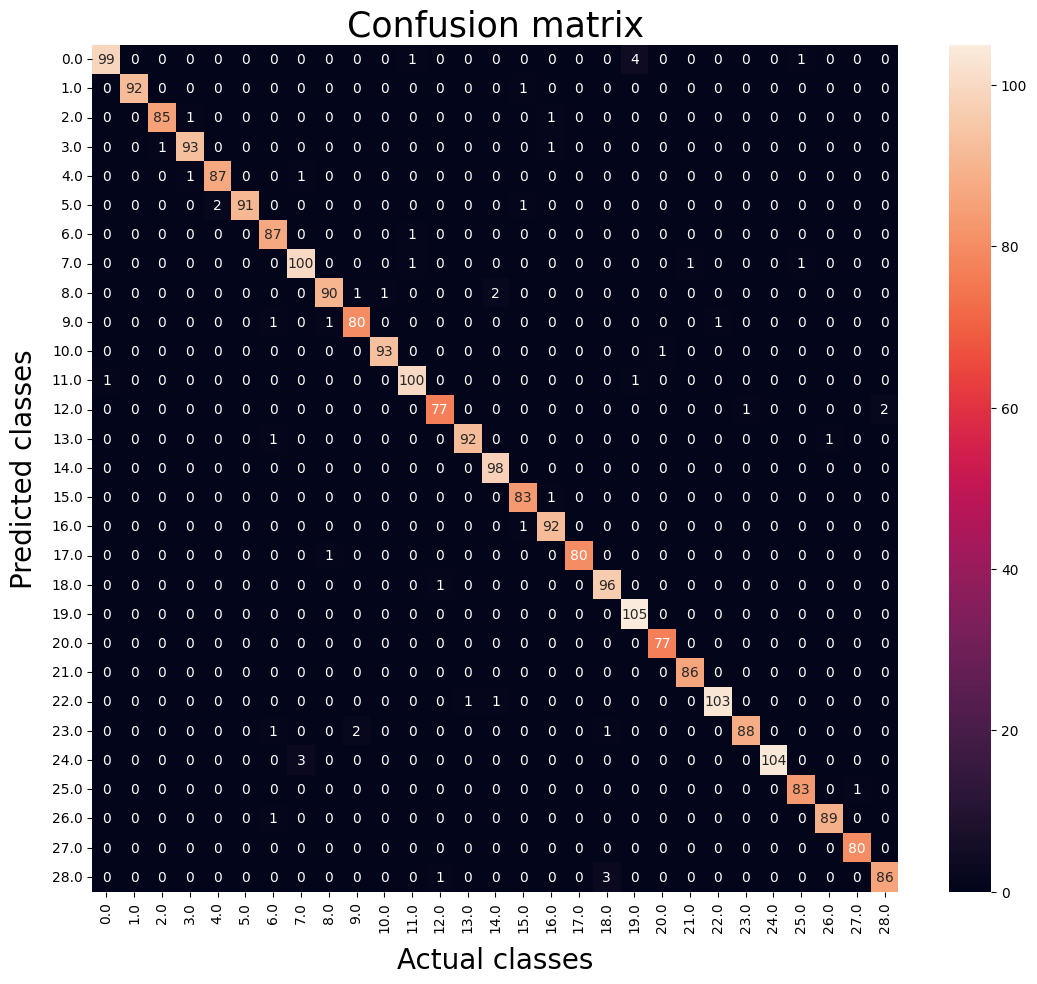

Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       105
         1.0       1.00      0.99      0.99        93
         2.0       0.99      0.98      0.98        87
         3.0       0.98      0.98      0.98        95
         4.0       0.98      0.98      0.98        89
         5.0       1.00      0.97      0.98        94
         6.0       0.96      0.99      0.97        88
         7.0       0.96      0.97      0.97       103
         8.0       0.98      0.96      0.97        94
         9.0       0.96      0.96      0.96        83
        10.0       0.99      0.99      0.99        94
        11.0       0.97      0.98      0.98       102
        12.0       0.97      0.96      0.97        80
        13.0       0.99      0.98      0.98        94
        14.0       0.97      1.00      0.98        98
        15.0       0.97      0.99      0.98        84
        16.0       0.97      0.99      0.98        93
     

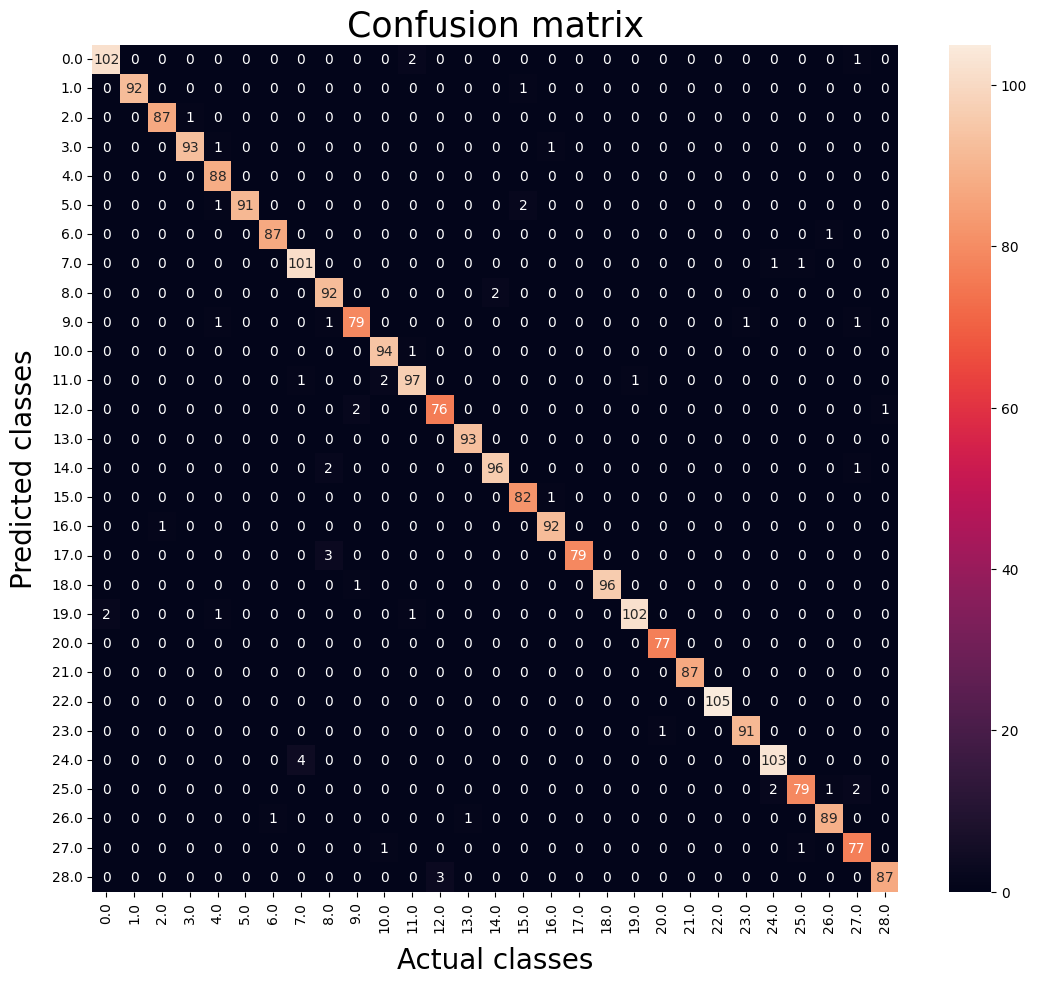

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       105
         1.0       1.00      0.99      0.99        93
         2.0       0.99      0.99      0.99        88
         3.0       0.99      0.98      0.98        95
         4.0       0.96      1.00      0.98        88
         5.0       1.00      0.97      0.98        94
         6.0       0.99      0.99      0.99        88
         7.0       0.95      0.98      0.97       103
         8.0       0.94      0.98      0.96        94
         9.0       0.96      0.95      0.96        83
        10.0       0.97      0.99      0.98        95
        11.0       0.96      0.96      0.96       101
        12.0       0.96      0.96      0.96        79
        13.0       0.99      1.00      0.99        93
        14.0       0.98      0.97      0.97        99
        15.0       0.96      0.99      0.98        83
        16.0       0.98      0.99      0.98        93
     

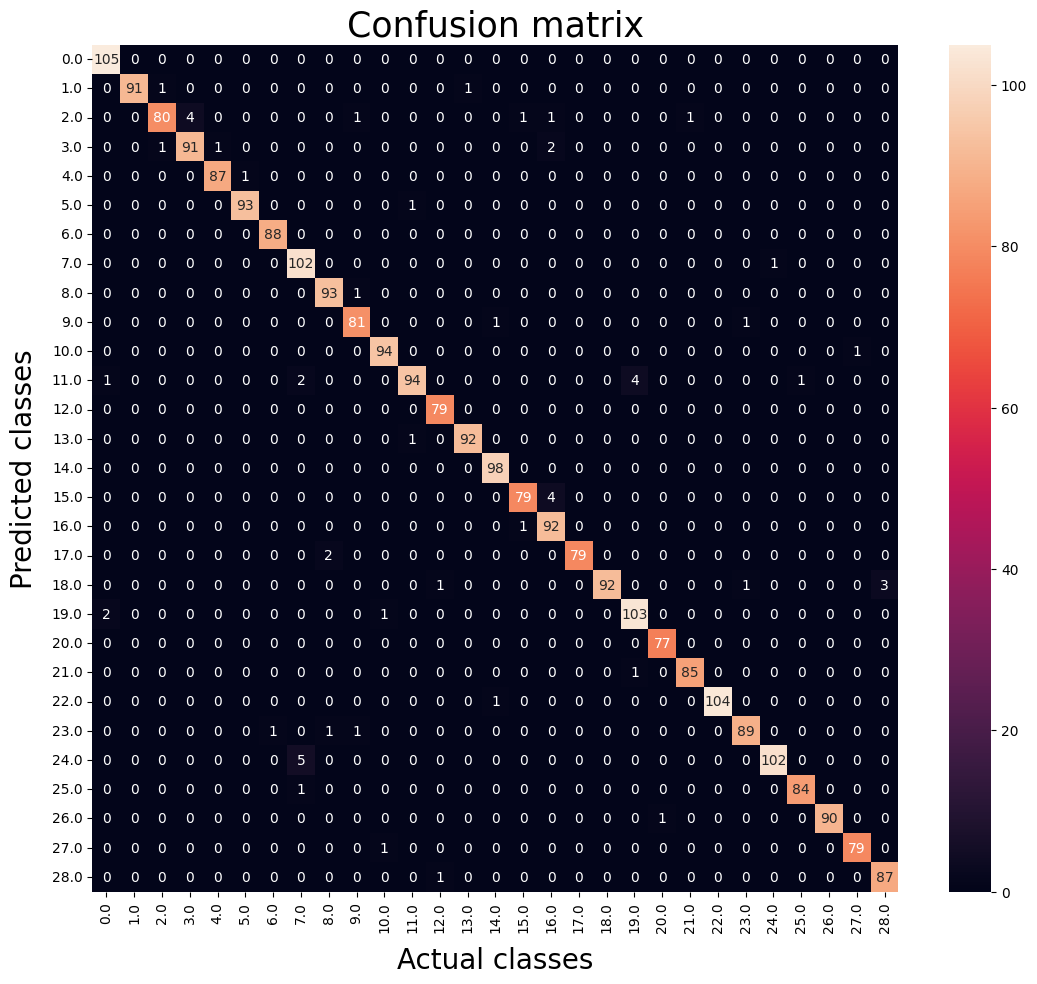

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       105
         1.0       1.00      0.98      0.99        93
         2.0       0.98      0.91      0.94        88
         3.0       0.96      0.96      0.96        95
         4.0       0.99      0.99      0.99        88
         5.0       0.99      0.99      0.99        94
         6.0       0.99      1.00      0.99        88
         7.0       0.93      0.99      0.96       103
         8.0       0.97      0.99      0.98        94
         9.0       0.96      0.98      0.97        83
        10.0       0.98      0.99      0.98        95
        11.0       0.98      0.92      0.95       102
        12.0       0.98      1.00      0.99        79
        13.0       0.99      0.99      0.99        93
        14.0       0.98      1.00      0.99        98
        15.0       0.98      0.95      0.96        83
        16.0       0.93      0.99      0.96        93
     

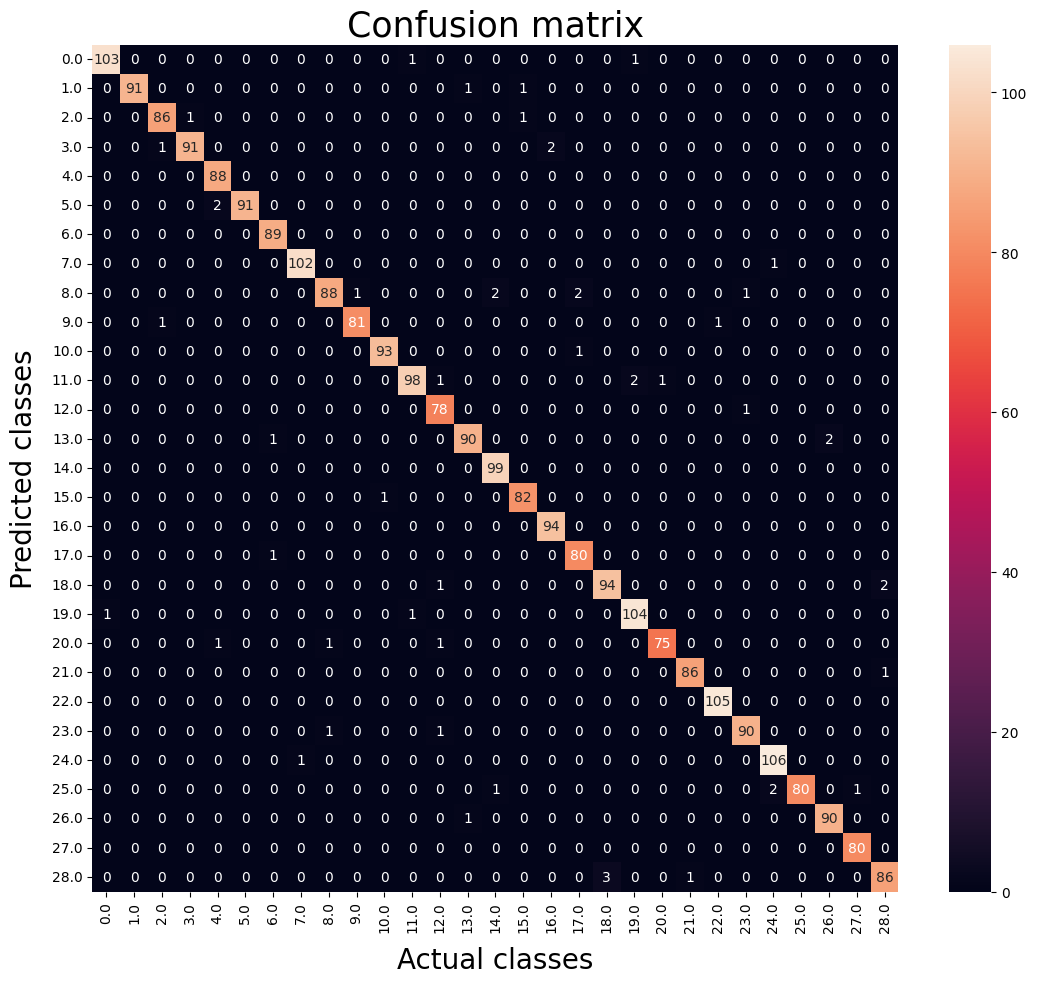

Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       105
         1.0       1.00      0.98      0.99        93
         2.0       0.98      0.98      0.98        88
         3.0       0.99      0.97      0.98        94
         4.0       0.97      1.00      0.98        88
         5.0       1.00      0.98      0.99        93
         6.0       0.98      1.00      0.99        89
         7.0       0.99      0.99      0.99       103
         8.0       0.98      0.94      0.96        94
         9.0       0.99      0.98      0.98        83
        10.0       0.99      0.99      0.99        94
        11.0       0.98      0.96      0.97       102
        12.0       0.95      0.99      0.97        79
        13.0       0.98      0.97      0.97        93
        14.0       0.97      1.00      0.99        99
        15.0       0.98      0.99      0.98        83
        16.0       0.98      1.00      0.99        94
     

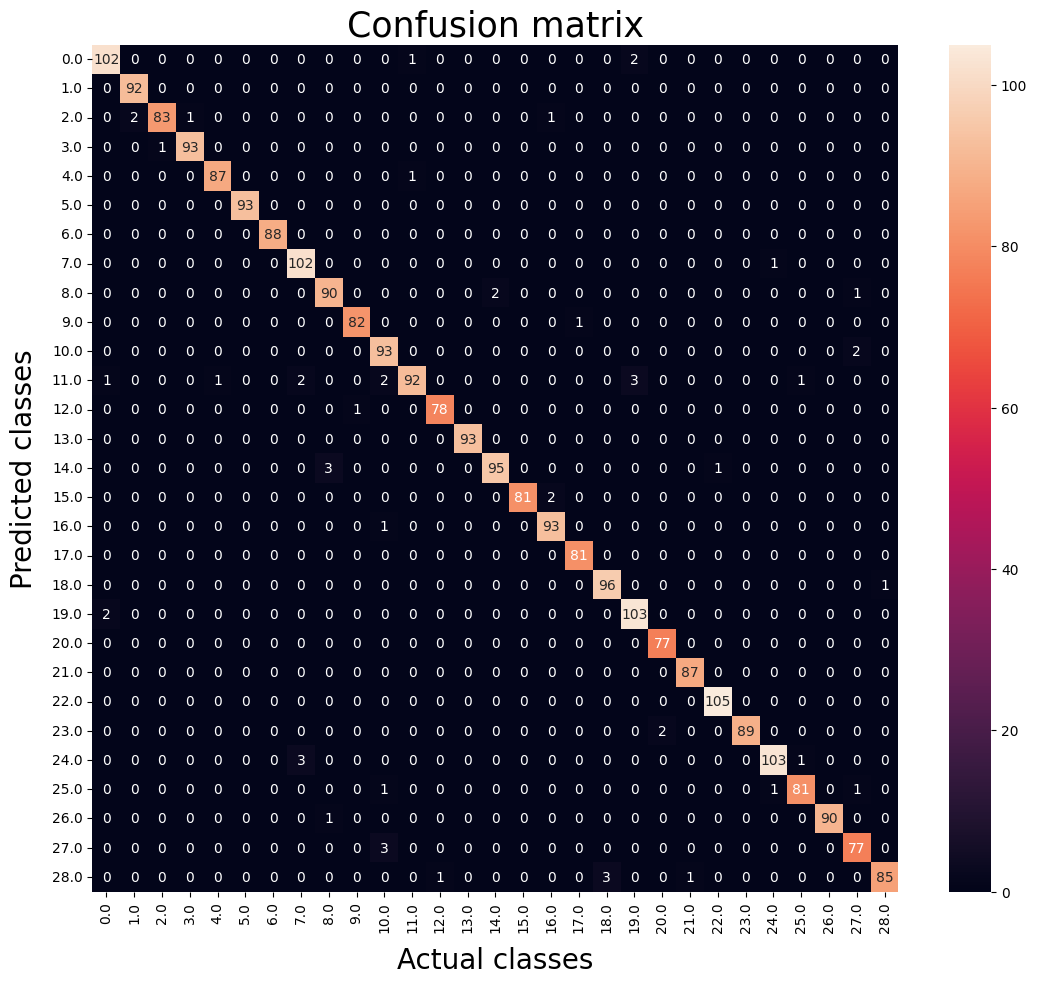

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       105
         1.0       0.98      1.00      0.99        92
         2.0       0.99      0.95      0.97        87
         3.0       0.99      0.99      0.99        94
         4.0       0.99      0.99      0.99        88
         5.0       1.00      1.00      1.00        93
         6.0       1.00      1.00      1.00        88
         7.0       0.95      0.99      0.97       103
         8.0       0.96      0.97      0.96        93
         9.0       0.99      0.99      0.99        83
        10.0       0.93      0.98      0.95        95
        11.0       0.98      0.90      0.94       102
        12.0       0.99      0.99      0.99        79
        13.0       1.00      1.00      1.00        93
        14.0       0.98      0.96      0.97        99
        15.0       1.00      0.98      0.99        83
        16.0       0.97      0.99      0.98        94
     

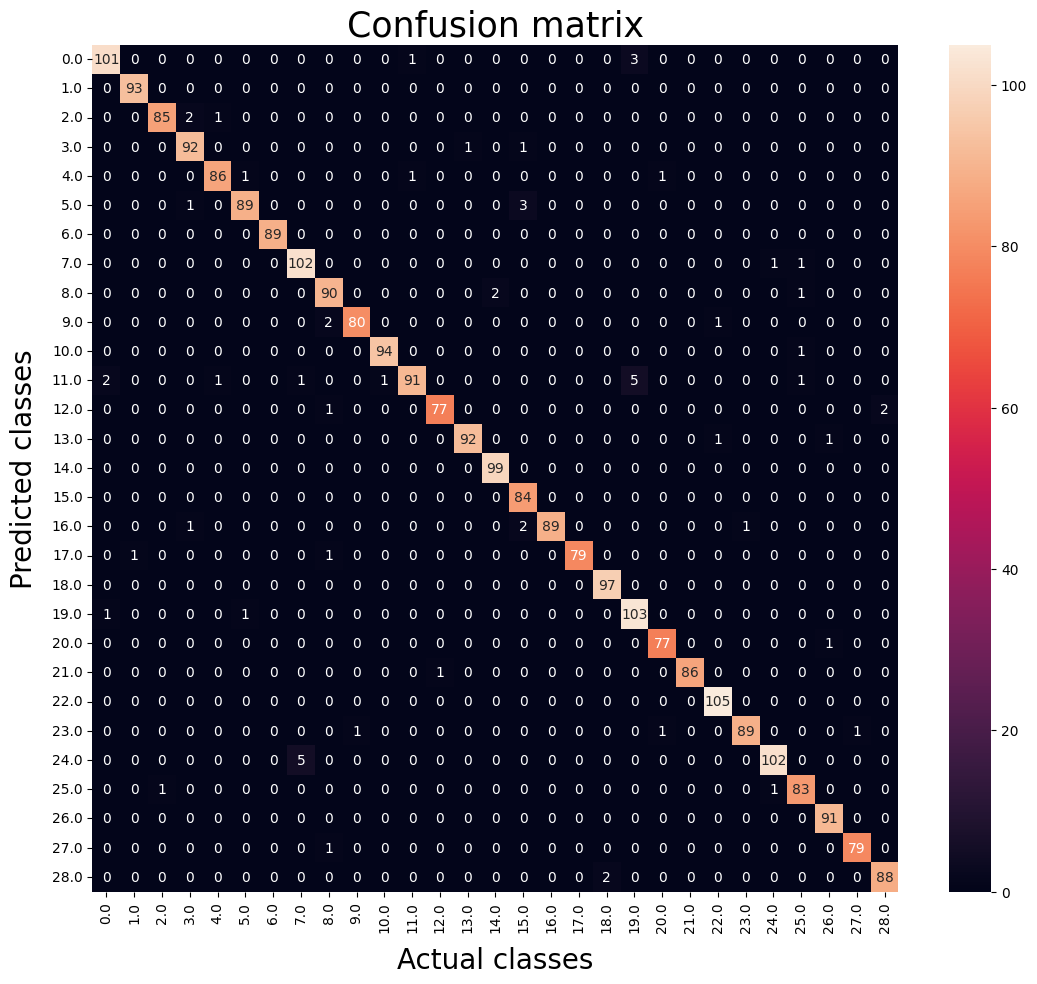

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       105
         1.0       0.99      1.00      0.99        93
         2.0       0.99      0.97      0.98        88
         3.0       0.96      0.98      0.97        94
         4.0       0.98      0.97      0.97        89
         5.0       0.98      0.96      0.97        93
         6.0       1.00      1.00      1.00        89
         7.0       0.94      0.98      0.96       104
         8.0       0.95      0.97      0.96        93
         9.0       0.99      0.96      0.98        83
        10.0       0.99      0.99      0.99        95
        11.0       0.98      0.89      0.93       102
        12.0       0.99      0.96      0.97        80
        13.0       0.99      0.98      0.98        94
        14.0       0.98      1.00      0.99        99
        15.0       0.93      1.00      0.97        84
        16.0       1.00      0.96      0.98        93
     

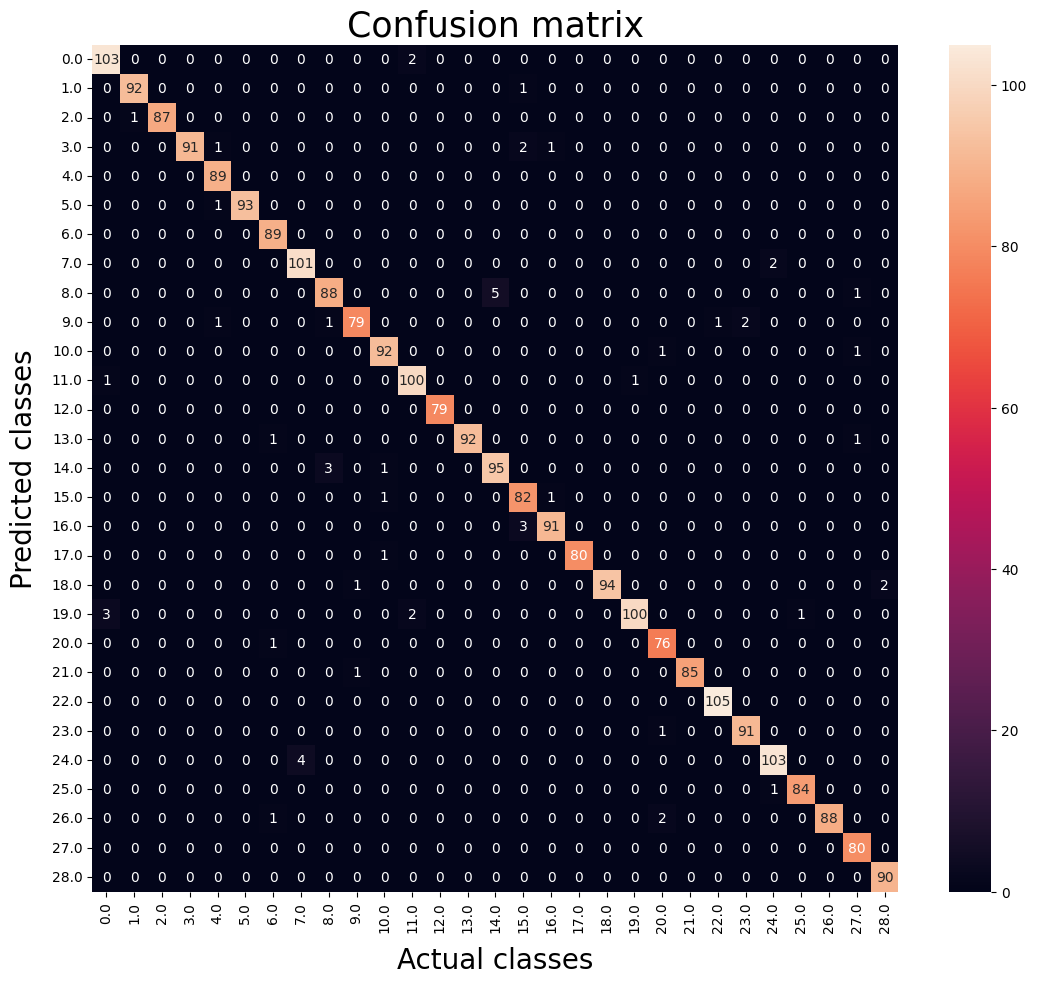

Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       105
         1.0       0.99      0.99      0.99        93
         2.0       1.00      0.99      0.99        88
         3.0       1.00      0.96      0.98        95
         4.0       0.97      1.00      0.98        89
         5.0       1.00      0.99      0.99        94
         6.0       0.97      1.00      0.98        89
         7.0       0.96      0.98      0.97       103
         8.0       0.96      0.94      0.95        94
         9.0       0.98      0.94      0.96        84
        10.0       0.97      0.98      0.97        94
        11.0       0.96      0.98      0.97       102
        12.0       1.00      1.00      1.00        79
        13.0       1.00      0.98      0.99        94
        14.0       0.95      0.96      0.95        99
        15.0       0.93      0.98      0.95        84
        16.0       0.98      0.97      0.97        94
     

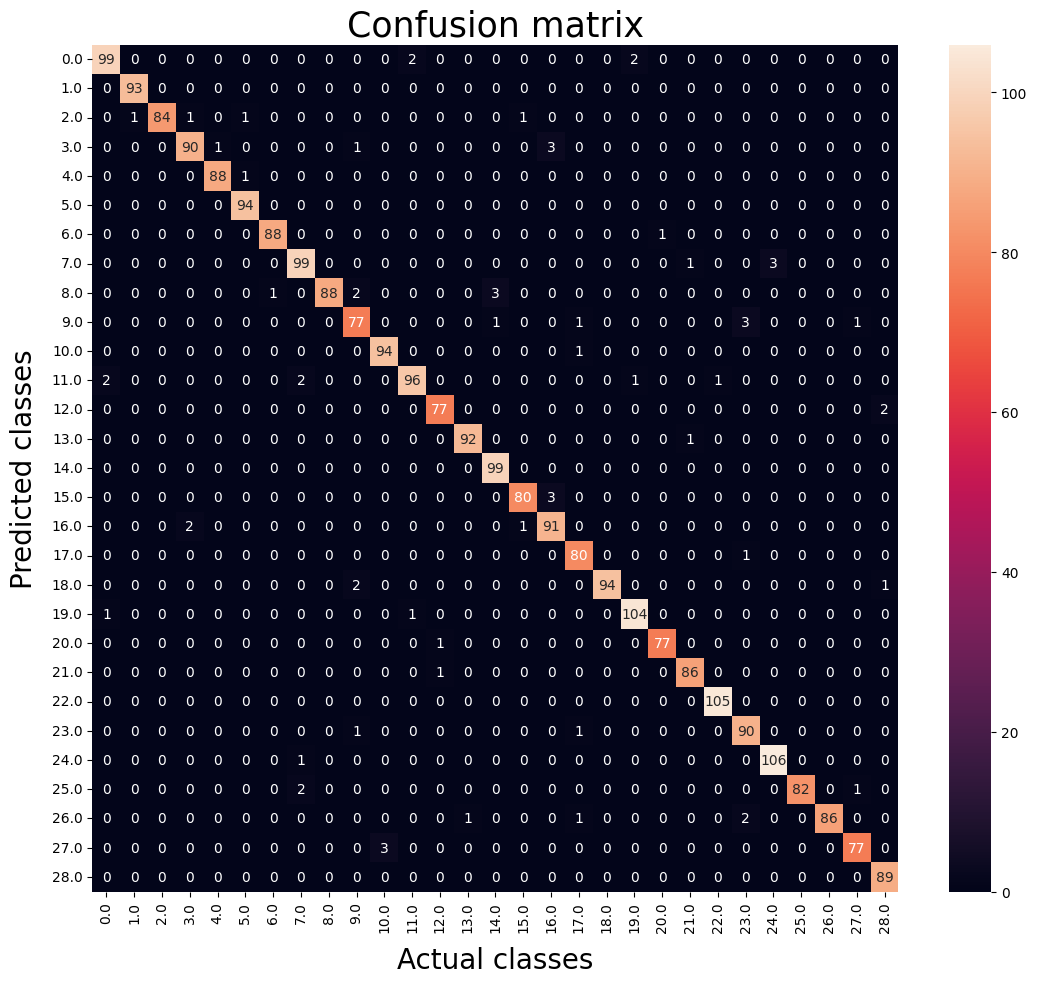

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       103
         1.0       0.99      1.00      0.99        93
         2.0       1.00      0.95      0.98        88
         3.0       0.97      0.95      0.96        95
         4.0       0.99      0.99      0.99        89
         5.0       0.98      1.00      0.99        94
         6.0       0.99      0.99      0.99        89
         7.0       0.95      0.96      0.96       103
         8.0       1.00      0.94      0.97        94
         9.0       0.93      0.93      0.93        83
        10.0       0.97      0.99      0.98        95
        11.0       0.97      0.94      0.96       102
        12.0       0.97      0.97      0.97        79
        13.0       0.99      0.99      0.99        93
        14.0       0.96      1.00      0.98        99
        15.0       0.98      0.96      0.97        83
        16.0       0.94      0.97      0.95        94
     

In [9]:
all_times=[]
all_acc=[]
all_prec=[]
all_recall=[]
all_f1score=[]


for k in range(1,11):
  print(k)

  valx_fold=[]
  valy_fold=[]
  x_fold=[]
  y_fold=[]

  for i in range(0, len(indices)-1):
    if (indices.values[i] == k):
      valx_fold.append(X_train[i])
      valy_fold.append(Y_train[i])
    else:
      x_fold.append(X_train[i])
      y_fold.append(Y_train[i])


  clf_fold = copy.copy(clf)
  clf_fold.fit(x_fold, y_fold)

  tic = time.perf_counter()
  y_pred=clf_fold.predict(valx_fold)
  toc = time.perf_counter()

  acc = metrics.accuracy_score(valy_fold, y_pred)
  pred_time = toc - tic

  print_confusion_matrix(valy_fold, y_pred)
  print("Accuracy:",acc)
  print("Prediction time:", pred_time)

  all_times.append(pred_time)
  all_acc.append(acc)
  all_prec.append(metrics.precision_score(valy_fold, y_pred, average='weighted'))
  all_recall.append(metrics.recall_score(valy_fold, y_pred, average='weighted'))
  all_f1score.append(metrics.f1_score(valy_fold, y_pred,average='weighted'))

  # zapis modelu
  path_clf = '/content/drive/MyDrive/MAGISTERKA/pliki_artykul/clf_k_'+str(k) + '.pkl'
  clfPickle = open(path_clf, 'wb')
  pickle.dump(clf_fold, clfPickle)



In [10]:
# Średnie
print("Average accuracy in folds: ", np.mean(all_acc))
print("Average prediction time:", np.mean(all_times))
print("Average precision in folds: ", np.mean(all_prec))
print("Average recall time:", np.mean(all_recall))
print("Average f1 score in folds: ", np.mean(all_f1score))

Average accuracy in folds:  0.9774655548822799
Average prediction time: 0.08350912409999864
Average precision in folds:  0.9777469908332066
Average recall time: 0.9774655548822799
Average f1 score in folds:  0.9774456571414522


# kNN z kfoldem


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
all_times=[]
all_acc=[]
all_prec=[]
all_recall=[]
all_f1score=[]

for k in range(1,11):
  print(k)

  valx_fold=[]
  valy_fold=[]
  x_fold=[]
  y_fold=[]

  for i in range(0, len(indices)-1):
    if (indices.values[i] == k):
      valx_fold.append(X_train[i])
      valy_fold.append(Y_train[i])
    else:
      x_fold.append(X_train[i])
      y_fold.append(Y_train[i])


  knn_fold = copy.copy(knn)
  knn_fold.fit(x_fold, y_fold)

  tic = time.perf_counter()
  y_pred=knn_fold.predict(valx_fold)
  toc = time.perf_counter()

  acc = metrics.accuracy_score(valy_fold, y_pred)
  pred_time = toc - tic

  print_confusion_matrix(valy_fold, y_pred)
  print("Accuracy:",acc)
  print("Prediction time:", pred_time)

  all_times.append(pred_time)
  all_acc.append(acc)
  all_prec.append(metrics.precision_score(valy_fold, y_pred, average='weighted'))
  all_recall.append(metrics.recall_score(valy_fold, y_pred, average='weighted'))
  all_f1score.append(metrics.f1_score(valy_fold, y_pred,average='weighted'))

  # zapis modelu
  path_knn = '/content/drive/MyDrive/MAGISTERKA/pliki_artykul/knn_k_'+str(k)
  knnPickle = open(path_knn, 'wb')
  pickle.dump(knn_fold, knnPickle)

In [ ]:
# Średnie
print("Average accuracy in folds: ", np.mean(all_acc))
print("Average prediction time:", np.mean(all_times))
print("Average precision in folds: ", np.mean(all_prec))
print("Average recall time:", np.mean(all_recall))
print("Average f1 score in folds: ", np.mean(all_f1score))

# SVM z k foldem
Dla tych parametrów wyniki są najlepsze. Tylko chyba trzeba wyświetlać więcej wartości po przecinku bo wszędzie wychodzi nam 0.99...

In [ ]:
from sklearn import svm
import sklearn.model_selection as model_selection


In [ ]:
all_times=[]
all_acc=[]
all_prec=[]
all_recall=[]
all_f1score=[]

for k in range(1,11):
  print(k)

  valx_fold=[]
  valy_fold=[]
  x_fold=[]
  y_fold=[]

  for i in range(0, len(indices)-1):
    if (indices.values[i] == k):
      valx_fold.append(X_train[i])
      valy_fold.append(Y_train[i])
    else:
      x_fold.append(X_train[i])
      y_fold.append(Y_train[i])

  rbf = svm.SVC(kernel='rbf', gamma=0.8, C=10).fit(x_fold, y_fold)


  tic = time.perf_counter()
  y_pred=rbf.predict(valx_fold)
  toc = time.perf_counter()

  acc = metrics.accuracy_score(valy_fold, y_pred)
  pred_time = toc - tic

  print_confusion_matrix(valy_fold, y_pred)
  print("Accuracy:",acc)
  print("Prediction time:", pred_time)

  all_times.append(pred_time)
  all_acc.append(acc)
  all_prec.append(metrics.precision_score(valy_fold, y_pred, average='weighted'))
  all_recall.append(metrics.recall_score(valy_fold, y_pred, average='weighted'))
  all_f1score.append(metrics.f1_score(valy_fold, y_pred,average='weighted'))

  print_confusion_matrix(valy_fold, y_pred)


In [ ]:
# Średnie
print("Average accuracy in folds: ", np.mean(all_acc))
print("Average prediction time:", np.mean(all_times))
print("Average precision in folds: ", np.mean(all_prec))
print("Average recall time:", np.mean(all_recall))
print("Average f1 score in folds: ", np.mean(all_f1score))